In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv(r'C:\Users\Prithvi\Downloads\mnist_digit.csv\train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=data.drop('label',axis=1)
Y=data['label']

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [5]:
lr=LogisticRegression()

In [6]:
lr.fit(X_train,Y_train)

C:\Users\Prithvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_train_pred=lr.predict(X_train)

In [8]:
acc_score_lr=accuracy_score(Y_train,y_train_pred)
acc_score_lr

0.9430952380952381

In [9]:
test_lr=lr.predict(X_test)

In [10]:
acc_score_test_lr=accuracy_score(Y_test,test_lr)
acc_score_test_lr

0.9111111111111111

In [11]:
svm_model=SVC()

In [12]:
svm_model.fit(X_train,Y_train)

SVC()

In [13]:
y_svm_train_pred=lr.predict(X_train)

In [14]:
acc_score_svm=accuracy_score(Y_train,y_svm_train_pred)
acc_score_svm

0.9430952380952381

In [15]:
test_svm=svm_model.predict(X_test)

In [16]:
acc_score_test_svm=accuracy_score(Y_test,test_svm)
acc_score_test_svm

0.9738095238095238

In [17]:
pca1=PCA(n_components=2)

In [18]:
img_pro=pca1.fit_transform(X_train)

In [19]:
df=pd.DataFrame(img_pro,columns=['PCA1','PCA2'])
df['labels']=Y_train

In [20]:
df

,PCA1,PCA2,labels
0,-923.172134,-686.126733,1.0
1,615.535302,-38.409234,0.0
2,-761.119715,-599.262885,1.0
3,494.186961,-892.192838,4.0
4,183.478743,-72.419934,0.0
...,...,...,...
29395,-238.933384,799.936972,7.0
29396,-1002.832552,-555.161040,4.0
29397,-480.317395,490.145551,0.0
29398,535.129728,885.626177,NaN


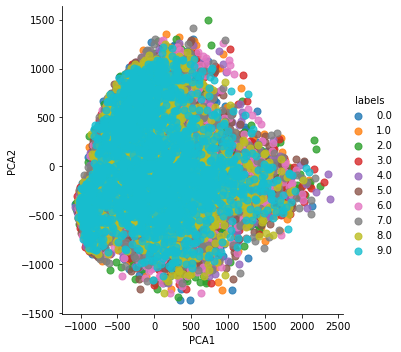

In [21]:
sns.lmplot('PCA1','PCA2',data=df,fit_reg=False,scatter_kws={'s':50},hue='labels')
plt.show()

In [22]:
pca2=PCA(0.90)

In [23]:
second_model=pca2.fit_transform(X_train)

In [24]:
pca2.n_components_

87

In [25]:
svc_model=SVC()

In [26]:
svc_model.fit(second_model,Y_train)

SVC()

In [27]:
y_svc_pred=svc_model.predict(second_model)

In [28]:
acc_score=accuracy_score(Y_train,y_svc_pred)
acc_score

0.991156462585034

In [29]:
test_svc=pca2.transform(X_test)

In [30]:
ytest_svc_pred=svc_model.predict(test_svc)

In [31]:
acc_score_test=accuracy_score(Y_test,ytest_svc_pred)
acc_score_test

0.9788888888888889

In [32]:
lr=LogisticRegression()

In [33]:
lr.fit(second_model,Y_train)

C:\Users\Prithvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_lr_pred=lr.predict(second_model)

In [35]:
acc_score1=accuracy_score(Y_train,y_lr_pred)
acc_score1

0.9179591836734694

In [36]:
test_lr=pca2.transform(X_test)

In [37]:
ytest_lr_pred=lr.predict(test_lr)

In [38]:
acc_score_test1=accuracy_score(Y_test,ytest_lr_pred)
acc_score_test1

0.9062698412698412

In [39]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


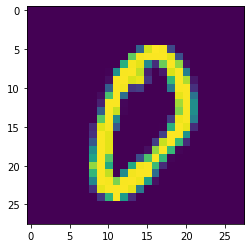

In [40]:
plt.imshow(np.array(X_train.loc[3088]).reshape(28,28))

In [41]:
Y_train.loc[3088]

0

In [42]:
dataframe={'Name':['logistic','SVC'],
           'Train accuracy before PCA':['0.9430952380952381','0.940952380952381'],
           'Test accuracy before PCA':['0.9111111111111111','0.9738095238095238'],
           "Train accuracy after PCA":['0.9179591836734694','0.991156462585034'],
           'Test accuracy after PCA':['0.9062698412698412','0.9788888888888889']}

In [43]:
pd.DataFrame(dataframe)

,Name,Train accuracy before PCA,Test accuracy before PCA,Train accuracy after PCA,Test accuracy after PCA
0,logistic,0.9430952380952381,0.9111111111111111,0.9179591836734694,0.9062698412698412
1,SVC,0.940952380952381,0.9738095238095238,0.991156462585034,0.9788888888888889
